In [76]:
# Importieren der Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

C:\Users\dasil\AppData\Local\Temp\ipykernel_18240\3297665199.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(add2022, ignore_index=True)


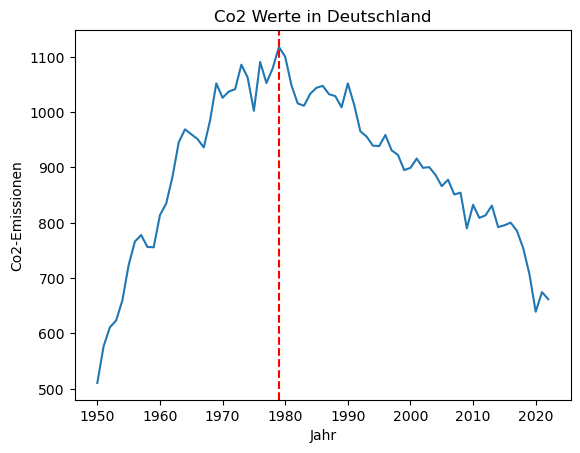

In [66]:
# Datensatz für die CO2-Emissionen laden
df=pd.read_csv("owid-co2-data.csv")

# CO2 Spalte für Deutschland erstellen
df=df.loc[df['country'] == 'Germany']
df=df[-72:]
df=df[["year","co2"]]
add2022={"year": 2022, "co2": 661.933}
df=df.append(add2022, ignore_index=True)
df["year"]=df["year"].astype(int)
df["co2"]=df["co2"].astype(float)

# Plot erstellen
sns.lineplot(x='year', y='co2', data=df)

# CO2 Höhepunkt darstellen
plt.axvline(x=1979, color='r', linestyle='--')

# Graph erzeugen
plt.xlabel('Jahr')
plt.ylabel('Co2-Emissionen')
plt.title('Co2 Werte in Deutschland')
plt.show()

# Speichern der Co2 Daten
#df.to_csv("co2 vorläufig 50-22.csv", index=False)

In [67]:
# Datensatz für die Anzahl der Autos
auto=pd.read_excel("Anzahl Fahrzeuge 1960 bis 2023.xlsx", 1)

# Df vorbereiten für die Interpolation
auto=auto.drop([0,1,2,3], axis=0)
auto=auto.drop(["Unnamed: 0"], axis=1)
auto=auto.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"anzahl in mio"})
auto["anzahl in mio"]=auto["anzahl in mio"].astype(int)
auto["jahr"]=auto["jahr"].astype(int)

# Aufteilung der Daten in jahr und die Anzahl der Autos
jahre = auto["jahr"]
werte = auto["anzahl in mio"]

# Jahre für die Interpolation
neue_jahre = np.arange(1960, 2024, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, werte, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'Jahre': neue_jahre, 'Werte': neue_werte}
auto = pd.DataFrame(data)

# Speichern der fertigen Daten
#auto.to_csv('Anzahl Fahrzeuge 60-23 intpl.csv', index=False)

In [8]:
# Datensatz für die Anzahl der Tankstellen
tankstelle_old=pd.read_excel("Anzahl Tankstellen 50-22.xlsx",1)

# Df vorbereiten für die Interpolation
tankstelle_old=tankstelle_old.drop([0,1,2,3], axis=0)
tankstelle_old=tankstelle_old.drop(["Unnamed: 0"], axis=1)
tankstelle_old=tankstelle_old.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"anzahl tankstellen"})
tankstelle_new=tankstelle_old[:5]
tankstelle_new["anzahl tankstellen"]=tankstelle_new["anzahl tankstellen"].astype(int)
tankstelle_new["jahr"]=tankstelle_new["jahr"].astype(int)

# Aufteilung der Daten in jahr und die Anzahl der Tankstellen
jahre = tankstelle_new["jahr"]
tankstelle_new = tankstelle_new["anzahl tankstellen"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 1971, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, tankstelle_new, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'anzahl tankstellen': neue_werte}
tankstelle_new = pd.DataFrame(data)
tankstelle_old=tankstelle_old[5:]
tankstellen_tog=pd.concat([tankstelle_new,tankstelle_old])

# Speichern der fertigen Daten
#tankstellen_tog.to_csv('Anzahl Tankstellen 50-23 intpl.csv', index=False)

C:\Users\dasil\AppData\Local\Temp\ipykernel_8260\3716873717.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tankstelle_new["anzahl tankstellen"]=tankstelle_new["anzahl tankstellen"].astype(int)
C:\Users\dasil\AppData\Local\Temp\ipykernel_8260\3716873717.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tankstelle_new["jahr"]=tankstelle_new["jahr"].astype(int)


In [10]:
# Datensatz für die Ausgaben der Forschung und Entwicklung (BAFE)
bafe=pd.read_excel("BAFE formatiert 81-20.xlsx")

# Df vorbereiten für die Interpolation
bafe_old=bafe[:3]

# Aufteilung der Daten in jahr und die Ausgaben
jahre = bafe_old["jahr"]
bafe_old = bafe_old["ausgaben"]

# Jahre für die Interpolation
neue_jahre = np.arange(1981, 1996, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, bafe_old, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'ausgaben': neue_werte}
bafe_old = pd.DataFrame(data)

# 2021 hinzufügen
bafe_new=bafe[3:]
bafe2021 = pd.DataFrame([['2021', 112563]],columns=['jahr', 'ausgaben'])
bafe_tog=pd.concat([bafe_old,bafe_new,bafe2021])

# Speichern der fertigen Daten
#bafe_tog.to_csv('bafe intpl.csv', index=False)

In [12]:
# Datensatz für den Dieselpreis
diesel=pd.read_excel("Dieselpreis 50-23.xlsx",1)

# Df vorbereiten für die Interpolation
diesel=diesel.drop([0,1,2,3], axis=0)
diesel=diesel.drop(["Unnamed: 0"], axis=1)
diesel_old=diesel.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"preis diesel"})
diesel_old=diesel_old[:5]
diesel_old["preis diesel"]=diesel_old["preis diesel"].astype(int)
diesel_old["jahr"]=diesel_old["jahr"].astype(int)

# Aufteilung der Daten in jahr und den Preis
jahre = diesel_old["jahr"]
diesel_old = diesel_old["preis diesel"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 1971, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, diesel_old, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'dieselpreis': neue_werte}
diesel_old = pd.DataFrame(data)
diesel_old = diesel_old[:-1]
diesel=diesel.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"dieselpreis"})
diesel_new=diesel[4:]
dieselpreis=pd.concat([diesel_old,diesel_new])

# Speichern der fertigen Daten
#dieselpreis.to_csv('dieselpreis intpl.csv', index=False)

In [71]:
# Datensatz für den Braunkohlekoks
koks=pd.read_excel("braunkohlekoks.xlsx")


# Aufteilung der Daten in jahr und Tonnen Koks
jahre = koks["jahr"]
koksbestand = koks["Braunkohlekoks (in Tsd. Tonnen)"]

# Jahre für die Interpolation
neue_jahre = np.arange(1951, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, koksbestand, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'tonnen koks': neue_werte}
koks_df = pd.DataFrame(data)

# Speichern der fertigen Daten
# koks_df.to_csv('braunkohlekoks.csv', index=False)

In [31]:
# Datensatz für das Heizöl
heizöl=pd.read_excel("heizöl.xlsx",1)

# Df vorbereiten für die Interpolation
heizöl=heizöl.drop([0,1,2,3], axis=0)
heizöl=heizöl.drop(["Unnamed: 0"], axis=1)
heizöl=heizöl.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"heizöl liter"})

# Aufteilung der Daten in jahr und Heizöl in Liter
jahre = heizöl["jahr"]
ölbestand = heizöl["heizöl liter"]

# Jahre für die Interpolation
neue_jahre = np.arange(1960, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, ölbestand, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'heizöl liter': neue_werte}
heizöl = pd.DataFrame(data)


# Speichern der fertigen Daten
#heizöl_tog.to_csv('heizöl intpl.csv', index=False)

In [33]:
# Datensatz für den Rinderbestand
rind=pd.read_excel("Rinderbestand.xlsx",1)

# Df vorbereiten für die Interpolation
rind=rind.drop([0,1,2,3], axis=0)
rind=rind.drop(["Unnamed: 0"], axis=1)
rind=rind.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"rinderbestand"})
rind["rinderbestand"]=rind["rinderbestand"].astype(int)
rind["jahr"]=rind["jahr"].astype(int)

# Aufteilung der Daten in jahr und Rinderbestand
jahre = rind["jahr"]
rinderbestand = rind["rinderbestand"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, rinderbestand, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'rinderbestand': neue_werte}
rind = pd.DataFrame(data)

# Speichern der fertigen Daten
#rind.to_csv('rinderbestand intpl.csv', index=False)

In [35]:
# Datensatz für den Schweinebestand
schwein=pd.read_excel("Schweinebestand.xlsx",1)

# Df vorbereiten für die Interpolation
schwein=schwein.drop([0,1,2,3], axis=0)
schwein=schwein.drop(["Unnamed: 0"], axis=1)
schwein=schwein.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"schweinebestand"})
schwein["schweinebestand"]=schwein["schweinebestand"].astype(int)
schwein["jahr"]=schwein["jahr"].astype(int)

# Aufteilung der Daten in jahr und Schweinebestand
jahre = schwein["jahr"]
schweinebestand = schwein["schweinebestand"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, schweinebestand, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'schweinebestand': neue_werte}
schwein = pd.DataFrame(data)


# Speichern der fertigen Daten
#schwein.to_csv('schweinebestand intpl.csv', index=False)

In [37]:
# Datensatz für den Schweinebestand
stau=pd.read_excel("Staulänge 02-22.xlsx",1)

# Df vorbereiten für die Interpolation
stau=stau.drop([0,1,2,3], axis=0)
stau=stau.drop(["Unnamed: 0"], axis=1)
stau=stau.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"Staulänge"})
stau["Staulänge"]=stau["Staulänge"].astype(int)
stau["jahr"]=stau["jahr"].astype(int)

# Aufteilung der Daten in jahr und Staulänge
jahre = stau["jahr"]
Staulänge = stau["Staulänge"]

# Jahre für die Interpolation
neue_jahre = np.arange(2002, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, Staulänge, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'Staulänge': neue_werte}
stau = pd.DataFrame(data)

# Speichern der fertigen Daten
#stau.to_csv('Staulänge intpl.csv', index=False)

In [41]:
# Datensatz für die Lebensmittelausgaben am Konsum
ausgaben=pd.read_excel("Anteil Konsumausgaben.xlsx",1)

# Df vorbereiten für die Interpolation
ausgaben=ausgaben.drop([0,1,2,3], axis=0)
ausgaben=ausgaben.drop(["Unnamed: 0"], axis=1)
ausgaben=ausgaben.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"anteil"})
ausgaben["anteil"]=ausgaben["anteil"].astype(int)
ausgaben["jahr"]=ausgaben["jahr"].astype(int)

# Aufteilung der Daten in jahr und die Ausgaben
jahre = ausgaben["jahr"]
ant = ausgaben["anteil"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, ant, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'anteil': neue_werte}
ausgaben = pd.DataFrame(data)


# Speichern der fertigen Daten
#ausgaben.to_csv('ausgaben anteil intpl.csv', index=False)

In [46]:
# Datensatz für die Nutzfläche
afläche=pd.read_excel("ackerfläche.xlsx",1)

# Df vorbereiten für die Interpolation
afläche=afläche.drop([0,1,2,3], axis=0)
afläche=afläche.drop(["Unnamed: 0"], axis=1)
afläche=afläche.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"fläche"})
afläche["fläche"]=afläche["fläche"].astype(int)
afläche["jahr"]=afläche["jahr"].astype(int)

# Aufteilung der Daten in jahr und Nutzfläche
jahre = afläche["jahr"]
fläche = afläche["fläche"]

# Jahre für die Interpolation
neue_jahre = np.arange(1950, 2023, 1)

# Lineare Interpolation
interp_func = interp1d(jahre, fläche, kind='linear')
neue_werte = interp_func(neue_jahre)

# Neues Df erstellen
data = {'jahr': neue_jahre, 'fläche': neue_werte}
afläche = pd.DataFrame(data)

# Speichern der fertigen Daten
# afläche.to_csv('ackerfläche intpl.csv', index=False)

In [84]:
# Datensatz für die Stromquellen aus Baden-Würtemberg
bw=pd.read_csv("Bruttostrom BW.csv", delimiter=";")

# Einfügen neuer Werte für 2022
bw22={'Jahr': 2022, 'Bruttostromerzeugung\nInsgesamt (Mill. kWh)': 49.628, 'Steinkohle': 16.142,
       'Heizöl':190.000, 'Erdgas': 3.567, 'Kernenergie': 11.151, 'Erneuerbare\r\nEnergieträger1)': 20.000,
       'Sonstige\r\nEnergieträger2)': 1.918}

# Neues Df erstellen
bw_tog=bw.append(bw22, ignore_index=True)

# Speichern der fertigen Daten
# bw_tog.to_csv("BW Stromerzeugung.csv", index=False)

C:\Users\dasil\AppData\Local\Temp\ipykernel_18240\1604607246.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bw_tog=bw.append(bw22, ignore_index=True)


In [48]:
# Datensatz für die Übernachtungsgäste
übernachtungen=pd.read_excel("übernachtungen.xlsx",1)

# Df vorbereiten für die Interpolation
übernachtungen=übernachtungen.drop([0,1,2,3], axis=0)
übernachtungen=übernachtungen.drop(["Unnamed: 0"], axis=1)
übernachtungen=übernachtungen.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"gäste"})
übernachtungen["gäste"]=übernachtungen["gäste"].astype(int)
übernachtungen["jahr"]=übernachtungen["jahr"].astype(int)
übernachtungen=übernachtungen[::-1]

# Lineare Interpolation
df_interpolated = übernachtungen.set_index("jahr").reindex(range(1990, 2023)).interpolate(method='linear').reset_index()
df_interpolated['gäste'] = df_interpolated['gäste'].interpolate(method='linear', limit_direction='backward')

# Speichern der fertigen Daten
# df_interpolated.to_csv('übernachtungen intpl.csv', index=False)

In [80]:
# Datensatz für den Anteil der Arbeitnehmer im Gastronomiebereich
gast=pd.read_excel("anteil arbeiter im gastgewerbe.xlsx",1)

# Df vorbereiten für die Extrapolation
gast=gast.drop([0,1,2,3], axis=0)
gast=gast.drop(["Unnamed: 0", "Unnamed: 3"], axis=1)
gast=gast.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"arbeiter gastgewerbe"})
gast["jahr"]=gast["jahr"].astype(int)

# Aufteilung der Daten in jahr und Gast
jahre = gast["jahr"]
daten = gast["arbeiter gastgewerbe"]

# Extrapolation
extrapolator = interp1d(jahre, daten, kind='linear', fill_value='extrapolate')
extrapoliert_gast= extrapolator(1990).item()

# Neues Df erstellen
neu_Gast={"jahr": 1990, "arbeiter gastgewerbe": extrapoliert_gast}
neu_Gast=pd.DataFrame({"jahr": [1990], "arbeiter gastgewerbe": [extrapoliert_gast]})
neu_Gast=pd.concat([neu_Gast, gast])

# Speichern der fertigen Daten
# neu_Gast.to_csv('arbeiter gastgewerbe extrplt.csv', index=False)

In [56]:
# Datensatz für die Ausgaben an Kleidungen
kleidung=pd.read_excel("ausgaben kleidung.xlsx",1)

# Df vorbereiten für die Extrapolation
kleidung=kleidung.drop([0,1,2,3], axis=0)
kleidung=kleidung.drop(["Unnamed: 0"], axis=1)
kleidung=kleidung.rename(columns = {'Unnamed: 1':'jahr', "Unnamed: 2":"kleidungsausgaben"})
kleidung["jahr"]=kleidung["jahr"].astype(int)

# Aufteilung der Daten in jahr und Kleidungsausgaben
jahre = kleidung["jahr"]
daten = kleidung["kleidungsausgaben"]

# Extrapolation
extrapolator = interp1d(jahre, daten, kind='linear', fill_value='extrapolate')
extrapoliert_gast= extrapolator(1990).item()

# Neues Df erstellen
neu_kleidung={"jahr": 1990, "kleidungsausgaben": extrapoliert_gast}
neu_kleidung=pd.DataFrame({"jahr": [1990], "kleidungsausgaben": [extrapoliert_gast]})
neu_kleidung=pd.concat([neu_kleidung, kleidung])

# Speichern der fertigen Daten
# neu_kleidung.to_csv('kleidungsausgaben extrplt.csv', index=False)

In [59]:
# Datensatz für den Arbeitnehmermarkt nach Sektoren
sektoren=pd.read_excel("Arbeitnehmer nach Sektoren.xlsx")

# Df vorbereiten für die Extrapolation
sektoren=sektoren[::-1]
jahre = sektoren["jahr"]
daten1 = sektoren["Primärsektor (in %)"]
daten2 = sektoren["Sekundärsektor (in %)"]
daten3 = sektoren["Tertiärsektor (in %)"]

# Extrapolation aller drei Sektoren
def extrapol(i):
    extrapolator = interp1d(jahre, i, kind='linear', fill_value='extrapolate')
    extrapoliert_1 = extrapolator(1951).item()
    extrapoliert_2 = extrapolator(1950).item()
    return extrapoliert_2, extrapoliert_1

# Extrapoliert für jede Variable
daten1=extrapol(daten1)
daten2=extrapol(daten2)
daten3=extrapol(daten3)

# Neues Df erstellen
drei_zusammen=pd.DataFrame({"jahr": [1950, 1951], "Primärsektor (in %)": daten1, "Sekundärsektor (in %)": daten2, "Tertiärsektor (in %)": daten3})
sektoren_extrplt=pd.concat([drei_zusammen, sektoren])

# Speichern der fertigen Daten
# sektoren_extrplt.to_csv("Anteil Sektoren extrplt.csv")

In [62]:
# Datensatz für die Neubauten
bw=pd.read_excel("neubauten bw.xlsx")

# Aufteilung der Daten in jahr und Kleidungsausgaben
jahre = bw["jahr"]
daten1 = bw["neubauten wohnungen"]

# Extrapolation
extrapolator = interp1d(jahre, daten1, kind='linear', fill_value='extrapolate')
extrapoliert_1 = extrapolator(1951).item()
extrapoliert_2 = extrapolator(1950).item()

# Neues Df erstellen
bw_neu=pd.DataFrame({"jahr": [1950, 1951], "neubauten wohnungen": [extrapoliert_2, extrapoliert_1]})
bw_extrplt=pd.concat([bw_neu, bw])

# Speichern der fertigen Daten
# bw_extrplt.to_csv("neubauten bw extrplt.csv")

In [72]:
# Datensatz für die Bevölkerungsentwicklung
bev=pd.read_excel("DE Bevölkerungsentwicklung 1871 - 2021.xlsx")

# Neuen Index mit den Jahren von 1950 bis 2021
jahre = range(1950, 2022)

# Setze den Index des DataFrame auf die Jahre
bev = bev.set_index("jahr")

# Reindexiere den DataFrame, um die fehlenden Jahre hinzuzufügen
bev = bev.reindex(jahre)

# Finde die fehlenden Werte heraus
nan_mask = bev.isna()
bev[nan_mask.any(axis=1)]

# Index neu setzen und den Datensatz ab 1950 beginnen lassen
bev.reset_index(inplace=True)

# Fehlende Werte mit dem Durchschnitt der Nachbarn auffüllen
bev['bevölkerung(in Tsd.)']=bev['bevölkerung(in Tsd.)'].fillna((bev['bevölkerung(in Tsd.)'].shift() + bev['bevölkerung(in Tsd.)'].shift(-1)) / 2)

# Hinzufügen von 2022 als fehlenden Wert
bev2022 = pd.DataFrame([['2022', 84300]],columns=['jahr', 'bevölkerung(in Tsd.)'])
bev_tog=pd.concat([bev,bev2022])
bev=bev_tog

# Speichern der fertigen Daten
# bev.to_csv("bevölkerung fill.csv")

In [75]:
# Datensätze für die Indizes der Kaufkraft
l08=pd.read_excel("indizes08.xlsx")
l08=l08[::-1]
l19=pd.read_csv("indizes19.csv")

# Einfügen neuer Werte für 2020-2022
l22=pd.DataFrame({"jahr": [2020, 2021, 2022], "reallohnindex": [104.1, 104, 99.8], "nominallohnindex": [109.7, 113.1, 116], "verbraucherpreisindex": [105.7, 109, 116.5]})

index=pd.concat([l19, l22])
index=index.reset_index(drop=True)
index
# Aufteilung der Daten in jahr und die Indizes
jahre = index["jahr"]
daten1 = index["reallohnindex"]
daten2 = index["nominallohnindex"]
daten3 = index["verbraucherpreisindex"]

# Extrapolation1
extrapolator = interp1d(jahre, daten1, kind='linear', fill_value='extrapolate')
extrapoliert_reallohn= extrapolator(1990).item()

# Extrapolation2
extrapolator = interp1d(jahre, daten2, kind='linear', fill_value='extrapolate')
extrapoliert_nominallohn= extrapolator(1990).item()

# Extrapolation3
extrapolator = interp1d(jahre, daten3, kind='linear', fill_value='extrapolate')
extrapoliert_verbraucherpreis= extrapolator(1990).item()

# Neues Df erstellen
neu_index=pd.DataFrame({"jahr": [1990], "reallohnindex": [extrapoliert_reallohn] ,"nominallohnindex": [extrapoliert_nominallohn], "verbraucherpreisindex": [extrapoliert_verbraucherpreis]})
neu_index=pd.concat([neu_index, index])


# Speichern der fertigen Daten
# neu_index.to_csv("index.csv")